In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

1. 讀入Fashion MNIST dataset

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

2. 欣賞數據集內容

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Trouser


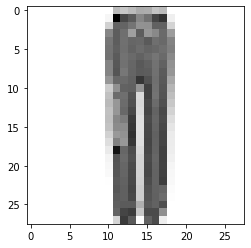

In [5]:
n = 1000
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

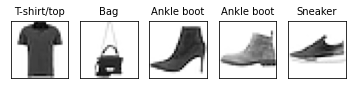

In [6]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

3. 資料整理

In [7]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
y_train[8] #test

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

3. 打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD



#####Model 1 

> 神經元數量150+100 , batch_size=10 (一次訓練的樣本數目)



In [0]:
model = Sequential()

In [0]:
model.add(Dense(150,input_dim=784,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

組裝我們的神經網路

In [16]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 133,860
Trainable params: 133,860
Non-trainable params: 0
_________________________________________________________________


In [17]:
[784*150+150]

[117750]

訓練

In [18]:
model.fit(x_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0351 - accuracy: 0.7598
Epoch 2/20
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0240 - accuracy: 0.8368
Epoch 3/20
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0219 - accuracy: 0.8513
Epoch 4/20
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0204 - accuracy: 0.8623
Epoch 5/20
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0195 - accuracy: 0.8681
Epoch 6/20
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0187 - accuracy: 0.8736
Epoch 7/20
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0181 - accuracy: 0.8778
Epoch 8/20
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0175 - accuracy: 0.8817
Epoch 9/20
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0169 - accuracy: 0.8862
Epoch 10/20
6000/6000 [==============================] - 10s 2ms/step - l

訓練成果

In [19]:
result=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


神經網路說是: Sneaker


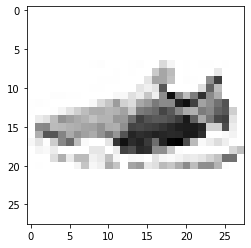

In [20]:
n= 70

print('神經網路說是:',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')



#####Model 2 

> 神經元數量150+100 , batch_size=100 (一次訓練的樣本數目)


In [0]:
model2 = Sequential()

In [0]:
model2.add(Dense(150,input_dim=784,activation='relu'))
model2.add(Dense(100,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [23]:
model2.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 133,860
Trainable params: 133,860
Non-trainable params: 0
_________________________________________________________________


In [24]:
model2.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0662 - accuracy: 0.5290
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0409 - accuracy: 0.7308
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0340 - accuracy: 0.7806
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0306 - accuracy: 0.8008
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0285 - accuracy: 0.8132
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0272 - accuracy: 0.8207
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0261 - accuracy: 0.8265
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0253 - accuracy: 0.8307
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0248 - accuracy: 0.8330
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0242 - accuracy: 0.8379

訓練成果

In [0]:
result2=model2.predict_classes(x_test)

神經網路說是: Pullover


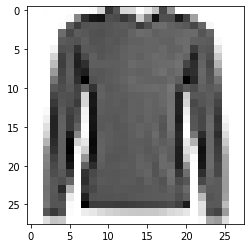

In [26]:
n= 70

print('神經網路說是:',class_names[result2[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')



#####Model 3 

> 神經元數量50+50 , batch_size=10 (一次訓練的樣本數目)


In [0]:
model3 = Sequential()

In [0]:
model3.add(Dense(50,input_dim=784,activation='relu'))
model3.add(Dense(50,activation='relu'))
model3.add(Dense(10,activation='softmax'))

In [29]:
model3.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [30]:
model3.fit(x_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0383 - accuracy: 0.7297
Epoch 2/20
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0247 - accuracy: 0.8318
Epoch 3/20
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0226 - accuracy: 0.8459
Epoch 4/20
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0212 - accuracy: 0.8558
Epoch 5/20
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0203 - accuracy: 0.8618
Epoch 6/20
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0196 - accuracy: 0.8679
Epoch 7/20
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0189 - accuracy: 0.8727
Epoch 8/20
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0184 - accuracy: 0.8753
Epoch 9/20
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0180 - accuracy: 0.8781
Epoch 10/20
6000/6000 [==============================] - 7s 1ms/step - loss: 0.017

訓練成果

In [0]:
result3=model3.predict_classes(x_test)

神經網路說是: Bag


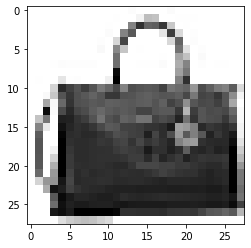

In [32]:
n= 70

print('神經網路說是:',class_names[result3[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

### 測試結論

#### 模型設定如下
(lr=0.087,  epochs=20)

> Model 1 : 神經元數量150+100 , batch_size=10

*   測試結果: 10s 2ms/step - loss: 0.0136 - accuracy: 0.9095


> Model 2 : 神經元數量150+100 , batch_size=100 (調整batch_size)

*   測試結果: 2s 3ms/step - loss: 0.0212 - accuracy: 0.8570


> Model 1 : 神經元數量 50+50 , batch_size=10  (調整神經元數量)


*   測試結果: 7s 1ms/step - loss: 0.0151 - accuracy: 0.8990



####從上述模型條件改變可觀察到:


1.   當增加batch_size時: 所花時間增加，loss下降，accuracy下降
2.   當減少神經元數量時: 所花時間稍微下降，loss微增，accuracy微降

